In [17]:
import mglearn as mglearn
import np as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

!pip install numpy scipy scikit-learn matplotlib pandas
from sklearn.model_selection import GridSearchCV

You should consider upgrading via the '/Users/engineer/workspace/cse590-machine-learning/venv/bin/python -m pip install --upgrade pip' command.


class example

In [18]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB

iris_dataset = datasets.load_iris()
features = iris_dataset.data
target = iris_dataset.target
classifier = GaussianNB()

model=classifier.fit(features, target)
new_observation = [[4, 4, 4, 0.4]]
model.predict(new_observation)
# array([1])

array([1])

lecture 14 decision tree

ValueError: Filler values must be provided when X has more than 2 training features.

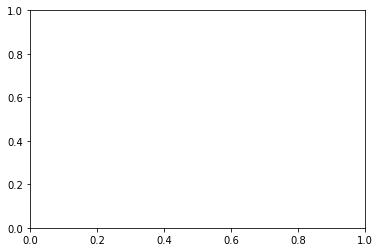

In [19]:
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris_dataset = datasets.load_iris()

X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0
)

tree_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=1
)
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(
    X_combined,
    y_combined,
    clf=tree_model,
    # filler_feature_values=range(105,150)
)

plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Breast Cancer

Accuracy training: {:.3f} 0.9882629107981221
Accuracy test: {:.3f} 0.951048951048951


[Text(0.5735294117647058, 0.9, 'X[20] <= 16.795\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(0.3235294117647059, 0.7, 'X[27] <= 0.136\ngini = 0.161\nsamples = 284\nvalue = [25, 259]'),
 Text(0.17647058823529413, 0.5, 'X[10] <= 1.048\ngini = 0.031\nsamples = 252\nvalue = [4, 248]'),
 Text(0.11764705882352941, 0.3, 'X[14] <= 0.003\ngini = 0.024\nsamples = 251\nvalue = [3, 248]'),
 Text(0.058823529411764705, 0.1, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.17647058823529413, 0.1, 'gini = 0.016\nsamples = 247\nvalue = [2, 245]'),
 Text(0.23529411764705882, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.47058823529411764, 0.5, 'X[21] <= 25.62\ngini = 0.451\nsamples = 32\nvalue = [21, 11]'),
 Text(0.35294117647058826, 0.3, 'X[24] <= 0.179\ngini = 0.375\nsamples = 12\nvalue = [3, 9]'),
 Text(0.29411764705882354, 0.1, 'gini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.4117647058823529, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.5882352941176471

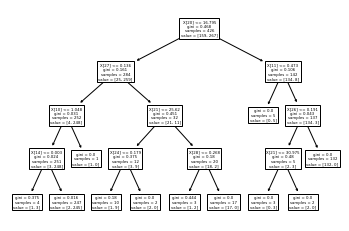

In [22]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

cancer_dataset = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer_dataset.data,
    cancer_dataset.target,
    stratify=cancer_dataset.target,
    random_state=42
)
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=0)
tree_clf.fit(X_train, y_train)
print("Accuracy training: {:.3f}",format(tree_clf.score(X_train, y_train)))
print("Accuracy test: {:.3f}",format(tree_clf.score(X_test, y_test)))

plot_tree(tree_clf)

In [21]:
from IPython.core.display_functions import display
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="tree.dot",
    class_names=["malignant", "benign"],
    feature_names=cancer_dataset.feature_names,
    impurity=False,
    filled=True
)

import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH